# 🧩 02 — Data Augmentation with SMOTE + Faker
In this notebook, I’ll learn how to **balance imbalanced fraud data** using SMOTE and add small realistic noise
to generate new numerical samples.  
I’ll also experiment with `Faker` to create readable context columns like merchants, cities, and timestamps.


In [3]:
# 🧬 Step 1: Setup and Imports

# Installing required libraries
!pip install faker imbalanced-learn

# Importing dependencies
import pandas as pd
import numpy as np
import random
from faker import Faker
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from daredev_fraud.data_ingestion import load_fraud_dataset 

# Setting a seed for reproducibility
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
faker = Faker()
Faker.seed(SEED)

print("✅ Libraries imported and seeds set.")

✅ Libraries imported and seeds set.


### 🧠 Why Seed?
Seeding ensures reproducibility.  
When random processes (like Faker or SMOTE) use the same seed, they generate the same “random” data each time you run the notebook.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

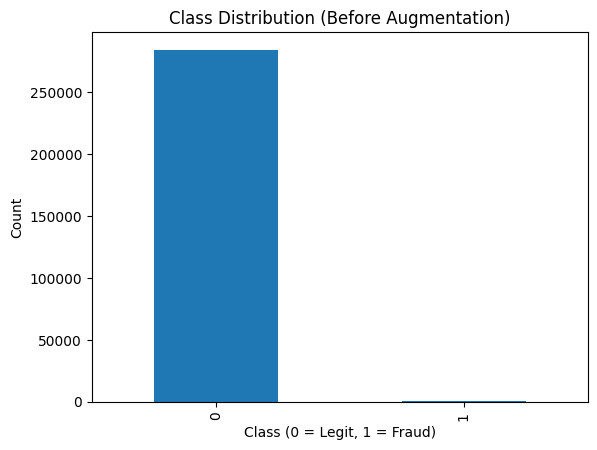

In [4]:
# 🧾 Step 2: Load the Dataset and Inspect Imbalance

df = load_fraud_dataset()
print("Shape:", df.shape)
print(df['Class'].value_counts())

df['Class'].value_counts().plot(kind='bar', title="Class Distribution (Before Augmentation)")
plt.xlabel("Class (0 = Legit, 1 = Fraud)")
plt.ylabel("Count")
plt.show()


### ⚠️ Observing Class Imbalance
Most transactions are legitimate (Class = 0), and only a few are fraudulent (Class = 1).  
This imbalance makes it hard for models to learn fraud patterns because they get overwhelmed by the majority class.


In [6]:
# ⚖️ Step 3: Apply SMOTE for Class Balancing

X = df.drop('Class', axis=1)
y = df['Class']

# Normalize data for SMOTE
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE
smote = SMOTE(random_state=SEED)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

print(pd.Series(y_resampled).value_counts())


Class
0    284315
1    284315
Name: count, dtype: int64


### 🤖 What is SMOTE?
SMOTE (Synthetic Minority Over-sampling Technique) helps balance datasets by **creating new synthetic samples**
for the minority class (fraud).  

It does this by interpolating between existing fraud samples instead of just copying them.

In [7]:
# 🌀 Step 4: Add Slight Variance Using NumPy Noise

# Adding a small Gaussian noise to introduce natural variation
noise = np.random.normal(0, 0.01, X_resampled.shape)
X_noisy = X_resampled + noise

print("✅ Noise added to synthetic data.")


✅ Noise added to synthetic data.


### 💡 Why Add Noise?
If we oversample data without variation, our model may memorize patterns (overfit).  
A small Gaussian noise keeps the data realistic while improving generalization.


In [8]:
# 🧮 Step 5: Combine Into Augmented DataFrame

augmented_df = pd.DataFrame(X_noisy, columns=X.columns)
augmented_df['Class'] = y_resampled

print("Shape after augmentation:", augmented_df.shape)
augmented_df.head()


Shape after augmentation: (568630, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.991616,-0.695625,-0.037598,1.688004,0.971024,-0.247458,0.362860,0.201353,0.077943,0.336553,...,-0.027181,0.383530,-0.191159,0.105063,0.247695,-0.403680,0.334649,-0.069788,0.242047,0
1,-2.002600,0.627019,0.161041,0.099220,0.324748,0.031275,-0.059731,-0.083297,0.057972,-0.230526,...,-0.311228,-0.886846,0.168318,-0.550821,0.330007,0.252677,-0.025348,0.047920,-0.332719,0
2,-2.001354,-0.695357,-0.822641,1.157506,0.276357,-0.351009,1.350733,0.649811,0.210989,-1.385127,...,0.341203,1.078137,1.451137,-1.146177,-0.633554,-0.279293,-0.133849,-0.186318,1.165819,0
3,-1.995591,-0.483638,-0.119190,1.179240,-0.613648,-0.022104,0.939111,0.194681,0.316069,-1.264849,...,-0.147708,0.007869,-0.280144,-1.942951,1.244919,-0.460564,0.143709,0.197617,0.148054,0
4,-1.988631,-0.600424,0.545569,1.007393,0.290524,-0.273111,0.062093,0.473639,-0.225514,0.739292,...,0.000232,1.083936,-0.218277,0.235849,-0.387383,1.029242,0.530415,0.657035,-0.070433,0


### 🧾 Result
Now I have a **balanced and slightly varied dataset** that represents both legitimate and fraudulent transactions equally.


In [9]:
# 🌍 Step 6: Add Optional Context Columns Using Faker

def add_context(n):
    merchants = [faker.company() for _ in range(n)]
    cities = [faker.city() for _ in range(n)]
    timestamps = [faker.date_time_this_year() for _ in range(n)]
    return merchants, cities, timestamps

n = len(augmented_df)
augmented_df['merchant'], augmented_df['city'], augmented_df['timestamp'] = add_context(n)

augmented_df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V24,V25,V26,V27,V28,Amount,Class,merchant,city,timestamp
0,-1.991616,-0.695625,-0.037598,1.688004,0.971024,-0.247458,0.362860,0.201353,0.077943,0.336553,...,0.105063,0.247695,-0.403680,0.334649,-0.069788,0.242047,0,"Rodriguez, Figueroa and Sanchez",Kennedymouth,2025-03-03 11:08:18.453318
1,-2.002600,0.627019,0.161041,0.099220,0.324748,0.031275,-0.059731,-0.083297,0.057972,-0.230526,...,-0.550821,0.330007,0.252677,-0.025348,0.047920,-0.332719,0,Doyle Ltd,New Dustinstad,2025-09-01 06:43:39.860653
2,-2.001354,-0.695357,-0.822641,1.157506,0.276357,-0.351009,1.350733,0.649811,0.210989,-1.385127,...,-1.146177,-0.633554,-0.279293,-0.133849,-0.186318,1.165819,0,"Mcclain, Miller and Henderson",South Isaacton,2025-06-08 09:27:32.107616
3,-1.995591,-0.483638,-0.119190,1.179240,-0.613648,-0.022104,0.939111,0.194681,0.316069,-1.264849,...,-1.942951,1.244919,-0.460564,0.143709,0.197617,0.148054,0,Davis and Sons,Allenside,2025-04-18 22:31:31.702780
4,-1.988631,-0.600424,0.545569,1.007393,0.290524,-0.273111,0.062093,0.473639,-0.225514,0.739292,...,0.235849,-0.387383,1.029242,0.530415,0.657035,-0.070433,0,"Guzman, Hoffman and Baldwin",Graystad,2025-07-25 08:23:37.886321


### 🧱 Faker Context
These context columns don’t affect model training (since PCA data is already abstract),  
but they make your dataset more interpretable for visualization or demos — adding a human-readable layer.


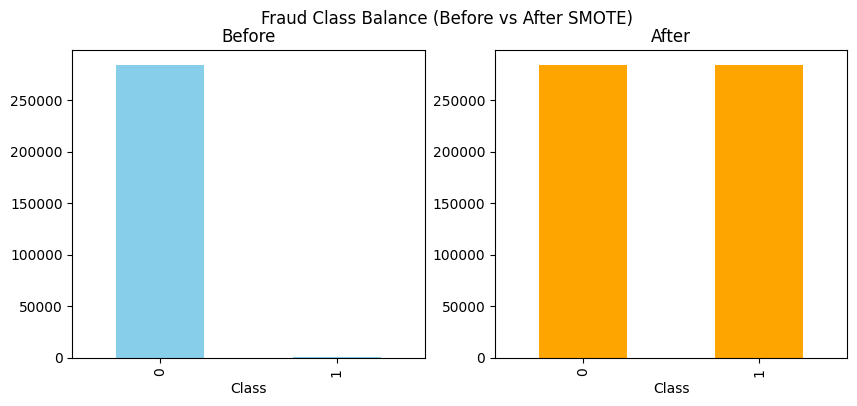

In [10]:
# 📈 Step 7: Visualize Before vs After Class Balance

fig, ax = plt.subplots(1, 2, figsize=(10,4))

df['Class'].value_counts().plot(kind='bar', ax=ax[0], title='Before', color='skyblue')
pd.Series(y_resampled).value_counts().plot(kind='bar', ax=ax[1], title='After', color='orange')

plt.suptitle('Fraud Class Balance (Before vs After SMOTE)')
plt.show()


In [ ]:
# 💾 Step 8: Save Augmented Dataset

augmented_df.to_csv("augmented_transactions.csv", index=False)
print("✅ Saved as augmented_transactions.csv")


### ✅ Summary
- Balanced the dataset using SMOTE  
- Added small noise to improve diversity  
- Optionally included Faker-generated context  
- Saved the final augmented dataset for modeling  

Next: I’ll move on to **data streaming or feature engineering** to prepare for model training.
